In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("BlackFriday.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
del df["Product_Category_2"]
del df["Product_Category_3"]          #handling null values

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df["User_ID"].nunique()

5891

In [9]:
df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [10]:
df["Product_ID"].nunique()

3623

In [11]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [12]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [15]:
df["Purchase"].sum()/len(df["Purchase"])

9333.859852635065

In [16]:
for i in df.columns:
    print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analysing Gender

In [17]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [18]:
df.groupby("Gender").size()             #Number of Males and Females

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

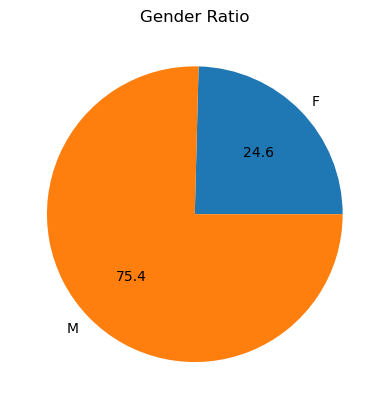

In [19]:
df.groupby("Gender").size().plot(kind='pie',autopct="%.1f",title="Gender Ratio")

<Axes: xlabel='Gender'>

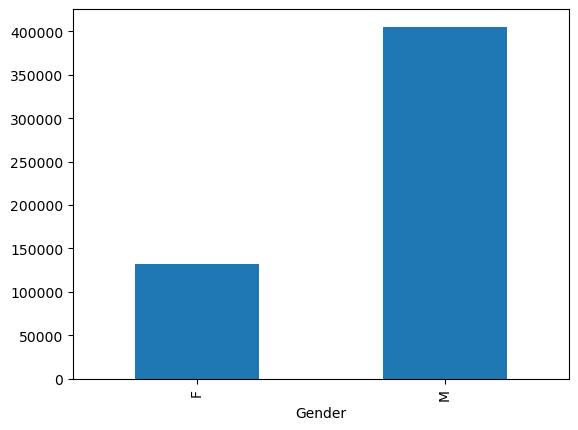

In [20]:
df.groupby("Gender").size().plot(kind='bar')

<Axes: ylabel='Purchase'>

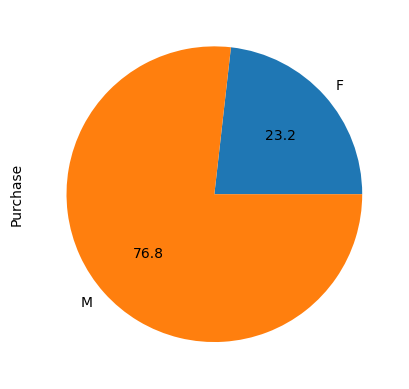

In [21]:
df_sum=df.groupby("Gender")["Purchase"].sum()

df_sum.plot(kind="pie",autopct='%.1f')

In [22]:
import matplotlib.pyplot as plt

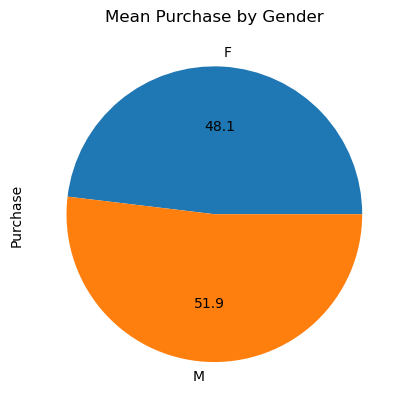

In [23]:
mean_purchase_by_gender = df.groupby('Gender')['Purchase'].mean()
mean_purchase_by_gender.plot(kind='pie',autopct="%0.1f")
plt.title('Mean Purchase by Gender')

plt.show()

# Analyzing Age and Marital Status

In [24]:
df.groupby("Age").size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Distribution by Age'}, xlabel='Age'>

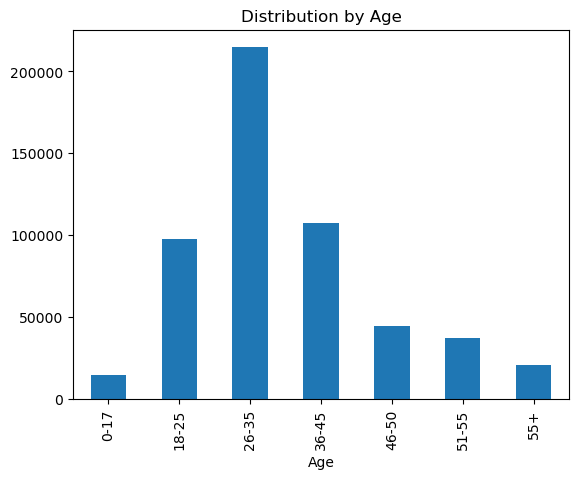

In [25]:
df.groupby("Age").size().plot(kind="bar",title="Distribution by Age")

<Axes: title={'center': 'Total Number of Unique Product Purchased'}, xlabel='Age'>

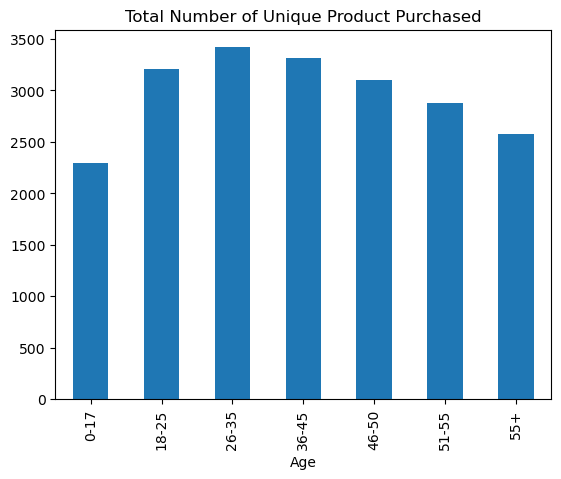

In [26]:
df.groupby("Age")["Product_ID"].nunique().plot(kind="bar",title="Total Number of Unique Product Purchased")

<Axes: title={'center': ' Age wise Amount spen'}, xlabel='Age'>

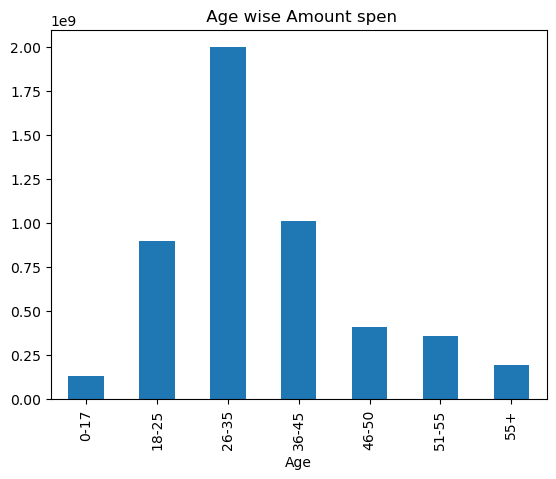

In [27]:
df_bar=df.groupby("Age")["Purchase"].sum()


df_bar.plot(kind='bar',title=' Age wise Amount spen')

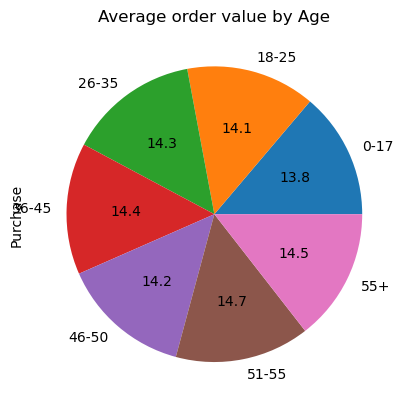

In [28]:
df_age=df.groupby("Age")['Purchase'].mean()
df_age.plot(kind="pie",autopct="%0.1f")
plt.title("Average order value by Age")
plt.show()

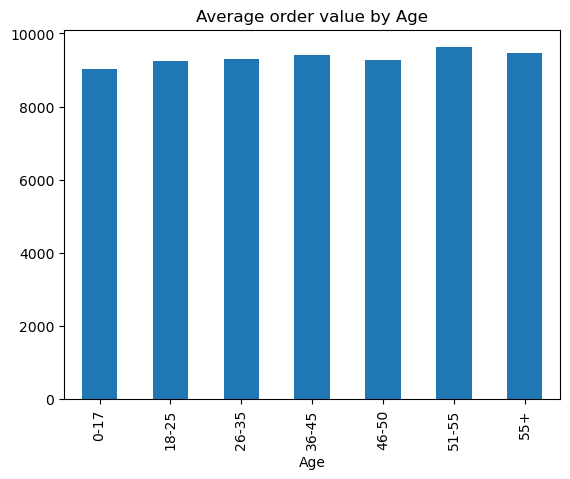

In [29]:
df_age=df.groupby("Age")['Purchase'].mean()
df_age.plot(kind="bar",x="Age",y="Purchase")
plt.title("Average order value by Age")                               #Barchart
plt.show()

# Multi Column Analysis

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

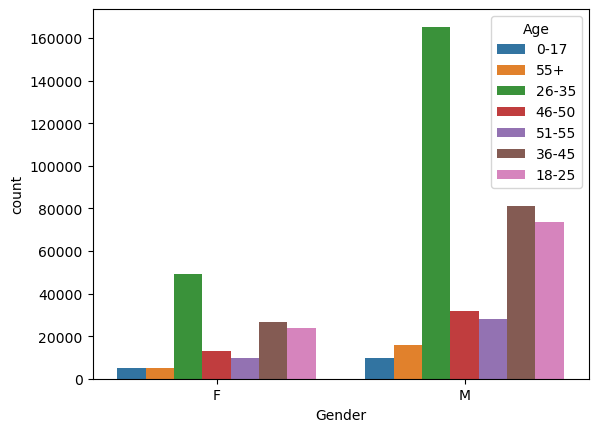

<Figure size 1000x600 with 0 Axes>

In [32]:
sns.countplot(x="Gender",hue="Age",data=df)
plt.figure(figsize=(10,6))


<Axes: xlabel='Age', ylabel='count'>

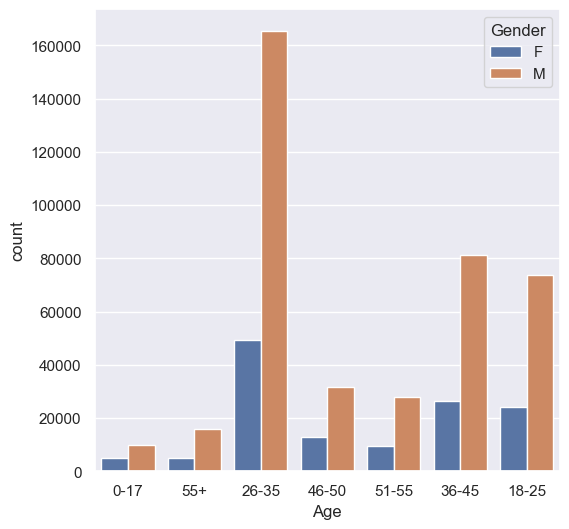

In [36]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x="Age",hue="Gender",data=df)


<Axes: xlabel='Gender', ylabel='count'>

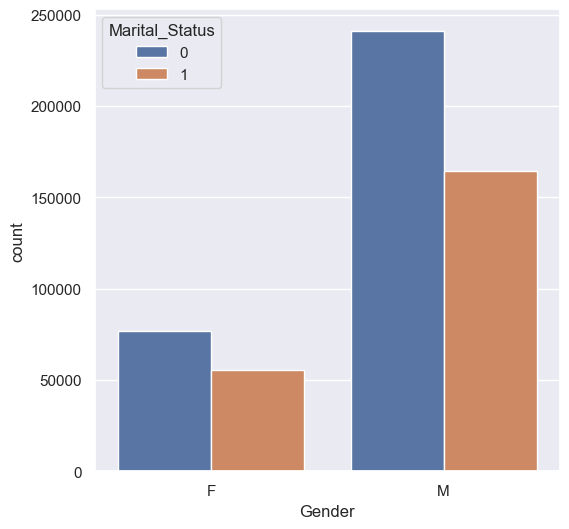

In [37]:
sns.set(rc = {'figure.figsize' : (6,6)})  #Product Purchased

sns.countplot(x="Gender",hue="Marital_Status",data=df)                

<Axes: xlabel='City_Category', ylabel='count'>

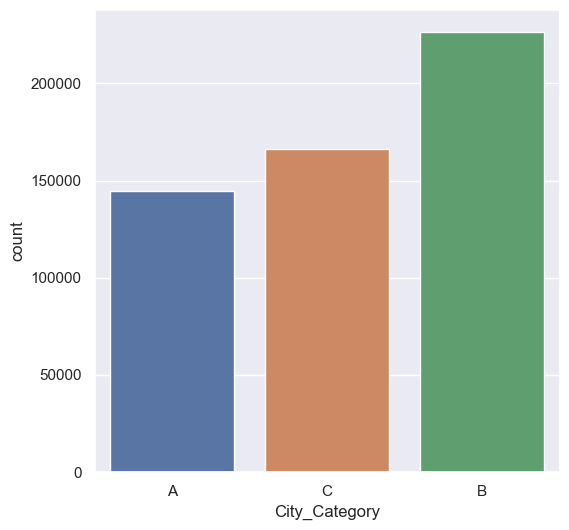

In [40]:
sns.countplot(x="City_Category",data=df)       #Total Sales By City

<Axes: xlabel='City_Category', ylabel='count'>

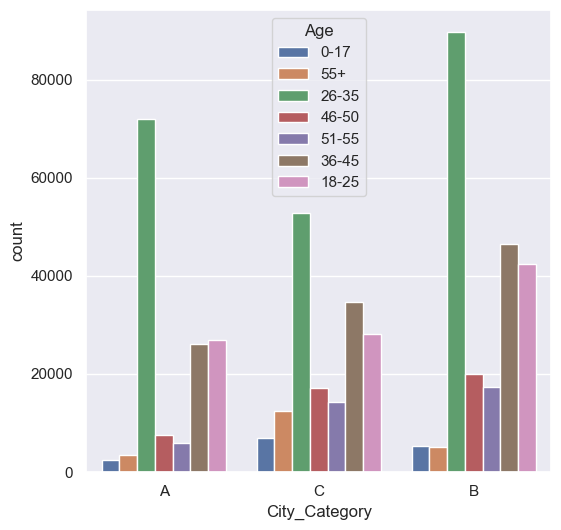

In [43]:
sns.countplot(x="City_Category",hue="Age",data=df) #City wise which product is purchasing more products


[Text(0, 0, 'Single'), Text(1, 0, 'Married')]

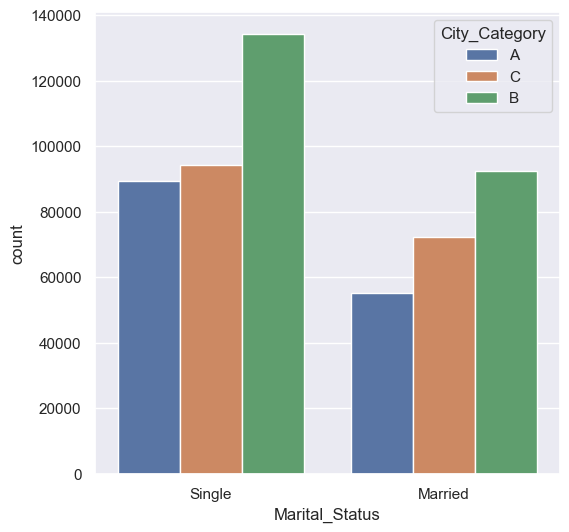

In [50]:

custom_labels = ['Single', 'Married']
ax=sns.countplot(x="Marital_Status",hue="City_Category",data=df)
ax.set_xticklabels(custom_labels)

<Axes: >

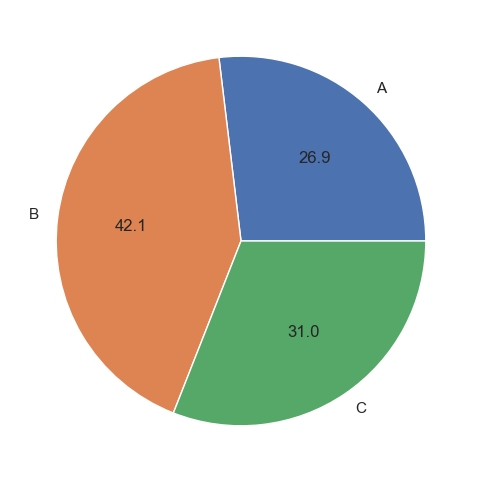

In [63]:
total_sales=df.groupby('City_Category').size()
total_sales.plot(kind = 'pie', autopct = '%0.1f')   #total products

<Axes: ylabel='Purchase'>

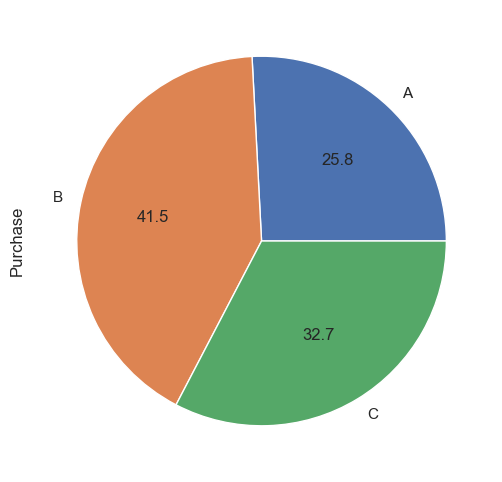

In [69]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")             #total purchase by city

<Axes: ylabel='Purchase'>

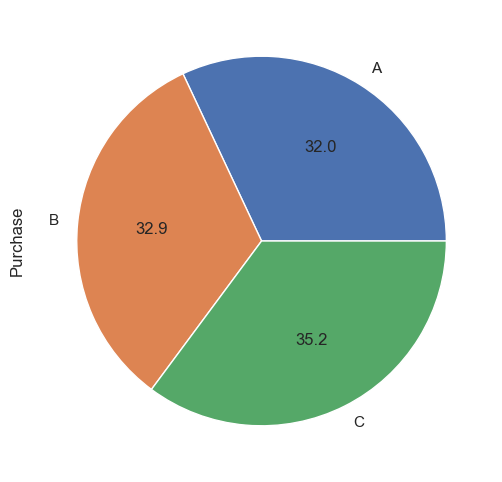

In [65]:
#Average Purchase By City

Avg_sales_by_city=df.groupby("City_Category")["Purchase"].mean()
Avg_sales_by_city.plot(kind="pie",autopct="%.1f")

# Analysing Other Columns

In [71]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

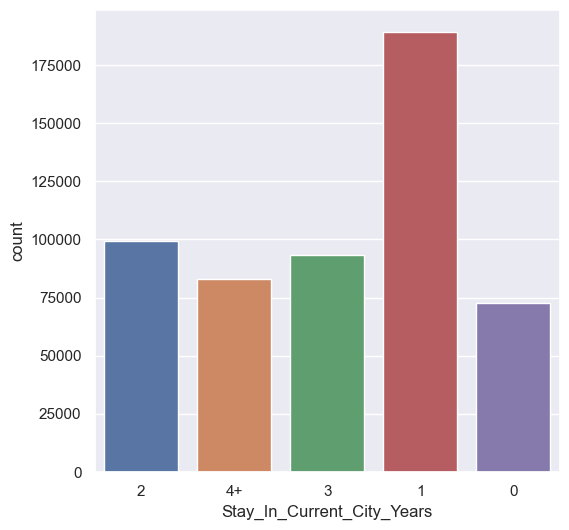

In [70]:
sns.countplot(x="Stay_In_Current_City_Years",data=df)

In [72]:
df.groupby("Stay_In_Current_City_Years").size()

Stay_In_Current_City_Years
0      72725
1     189192
2      99459
3      93312
4+     82889
dtype: int64

<Axes: >

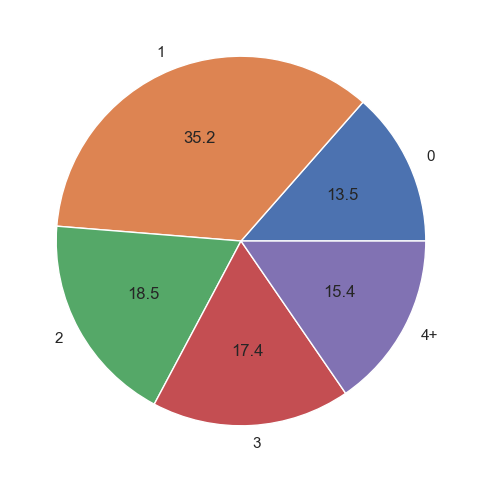

In [75]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f") 

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

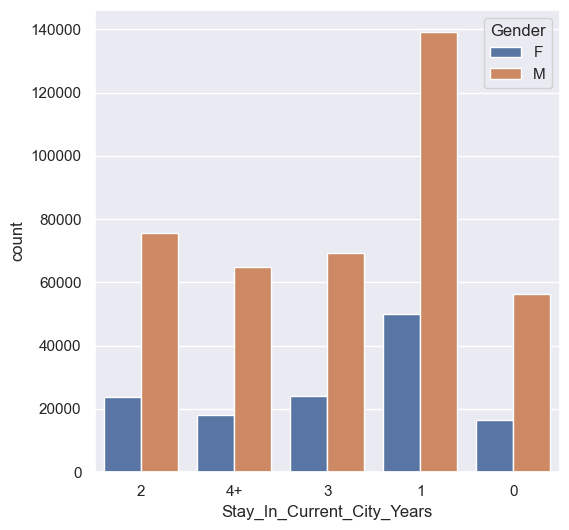

In [76]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender",data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

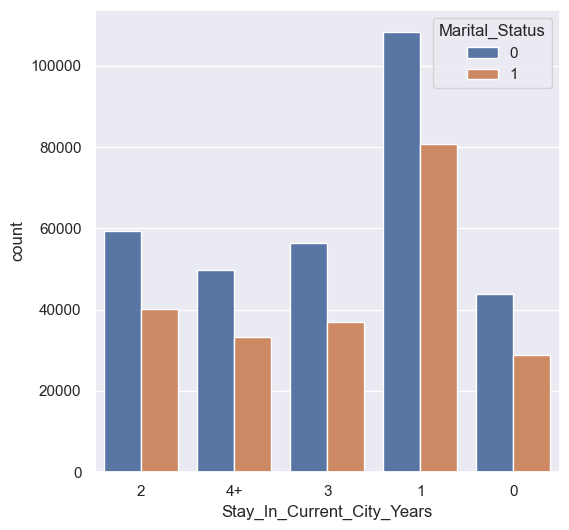

In [77]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_Status",data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

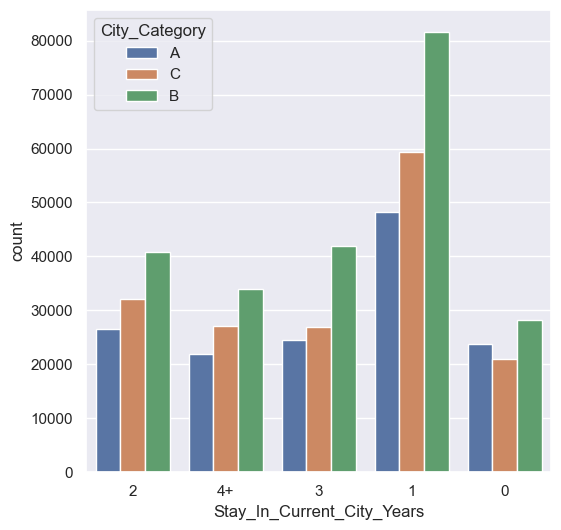

In [78]:
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",data=df)

From above we can analyse that Male who is unmarried and staying in city  B for atleast 1 year is our main Customer.

<Axes: ylabel='Purchase'>

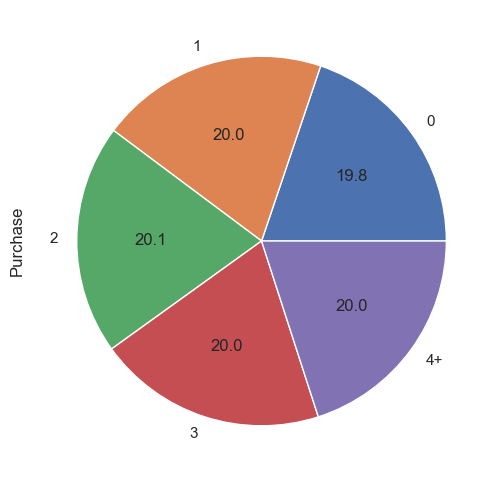

In [81]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="pie",autopct="%.1f")


<Axes: xlabel='Stay_In_Current_City_Years'>

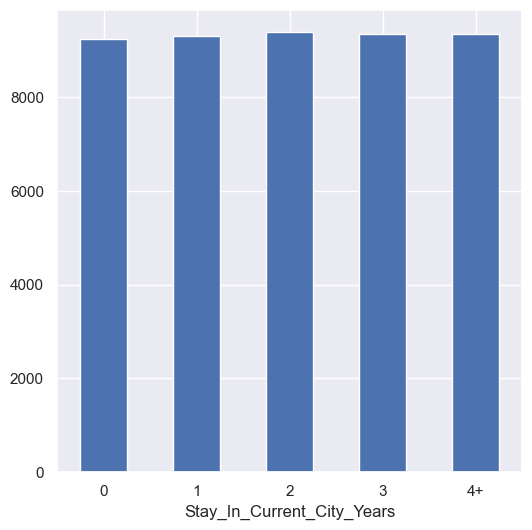

In [84]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="bar",rot=0)

Average purchase is nearly same

<Axes: xlabel='Stay_In_Current_City_Years'>

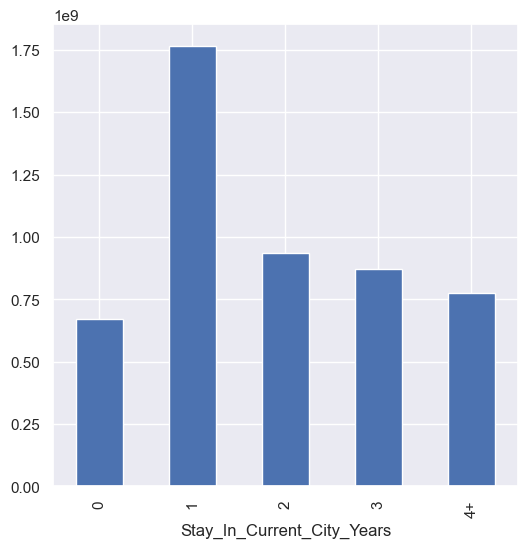

In [86]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind="bar")

# Occupation

<Axes: xlabel='Occupation', ylabel='count'>

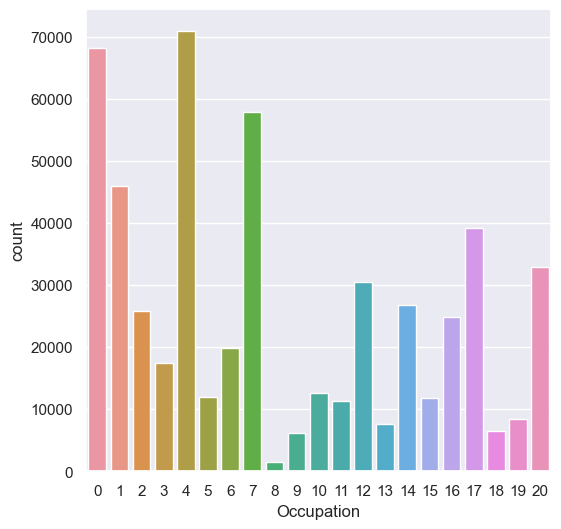

In [87]:
sns.countplot(x="Occupation",data=df)

<Axes: xlabel='Occupation'>

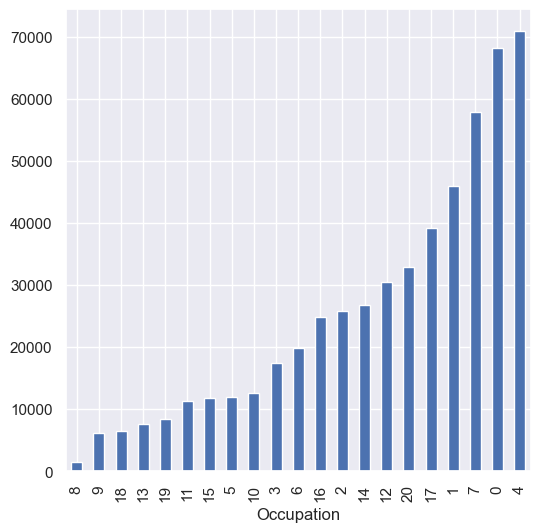

In [89]:
df.groupby('Occupation').size().sort_values().plot(kind='bar') #Purchasing Products

<Axes: xlabel='Occupation'>

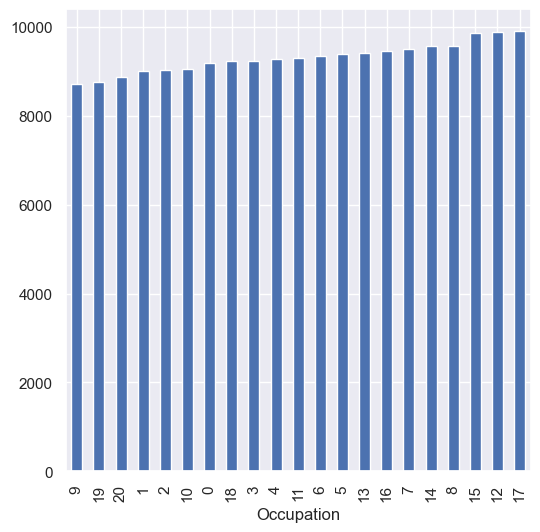

In [91]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

Occupation 17 is buying most expensive product

<Axes: xlabel='Occupation', ylabel='count'>

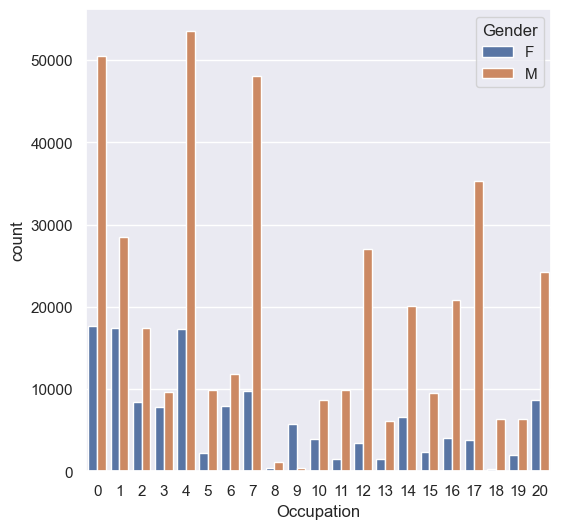

In [92]:
sns.countplot(x="Occupation", hue="Gender", data=df)

Unique Products people are buying from Diffrent Occupation

<Axes: xlabel='Occupation'>

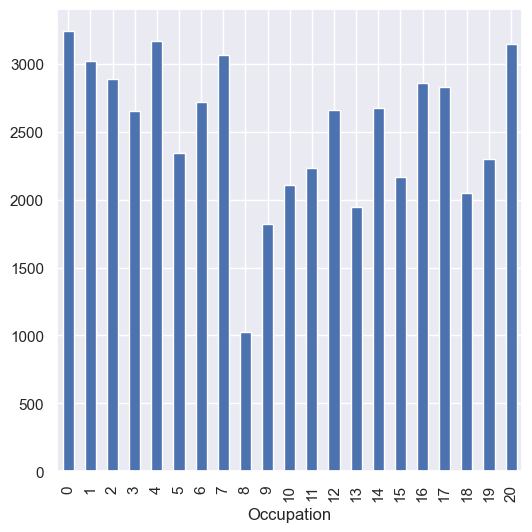

In [97]:
df.groupby("Occupation")["Product_ID"].nunique().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

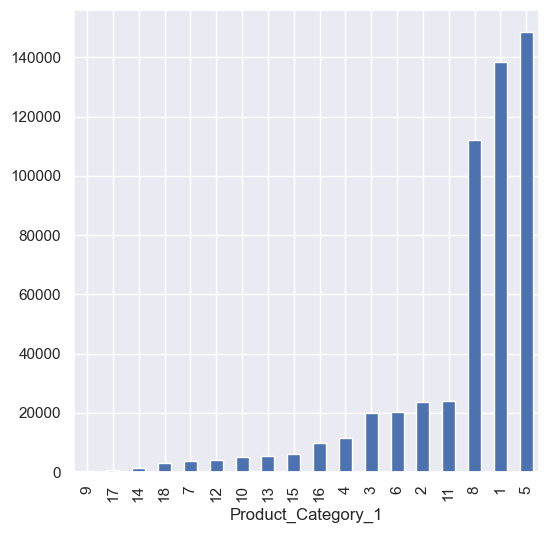

In [100]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")

Product 8,1,5 are the most selling Products

<Axes: xlabel='Product_Category_1'>

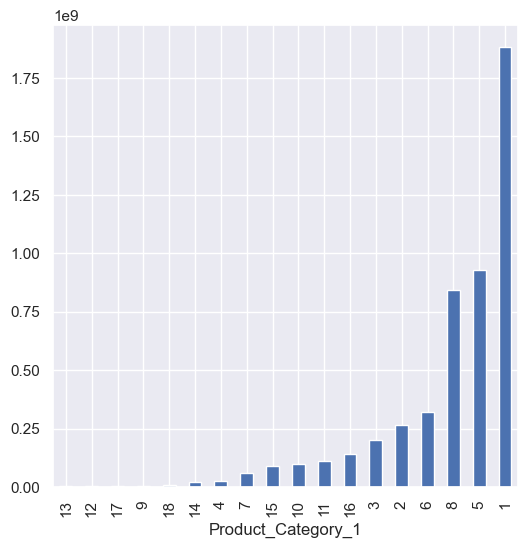

In [102]:
df.groupby("Product_Category_1")["Purchase"].sum().sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

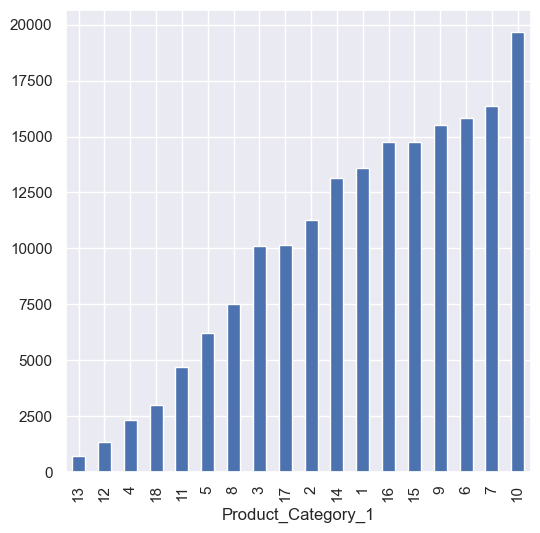

In [103]:
df.groupby("Product_Category_1")["Purchase"].mean().sort_values().plot(kind="bar")

Product Category 13 is the cheapest and Product Category 10 is most Expensive

<Axes: xlabel='Product_ID'>

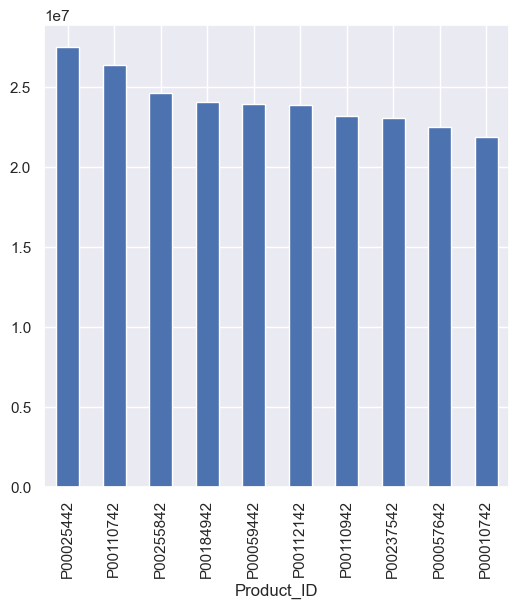

In [104]:
df.groupby("Product_ID")["Purchase"].sum().nlargest(10).plot(kind="bar")

Most Selling Products

<Axes: xlabel='Product_ID'>

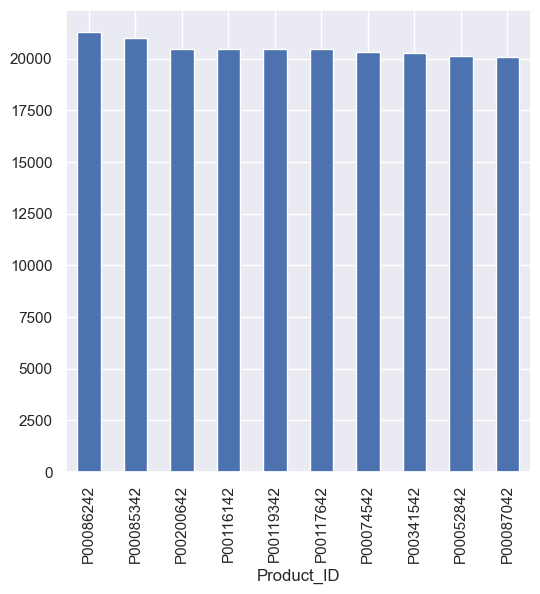

In [106]:
df.groupby("Product_ID")["Purchase"].mean().nlargest(10).plot(kind="bar")

Most Expensive Product

<Axes: xlabel='Product_Category_1', ylabel='count'>

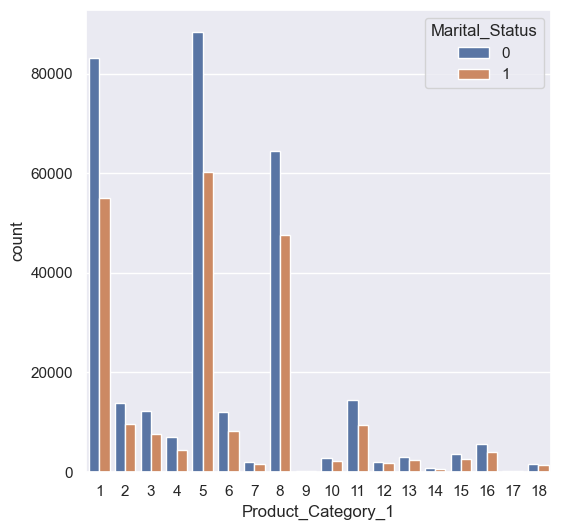

In [107]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

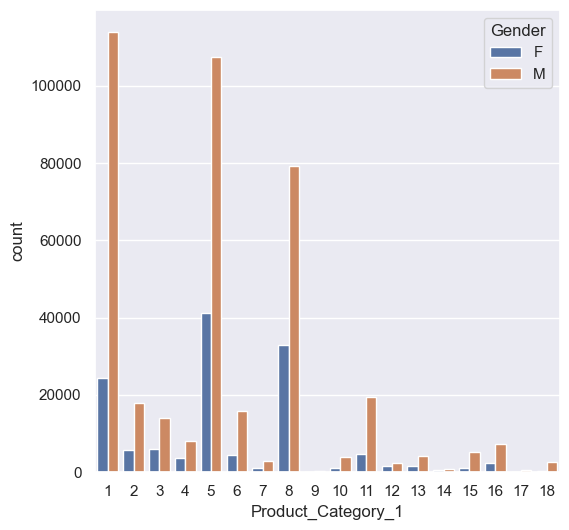

In [108]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

# Combining Gender and Marital Status

In [110]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [111]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

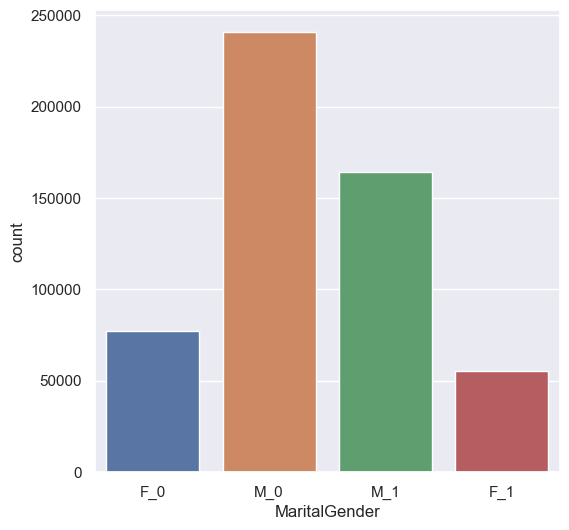

In [112]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

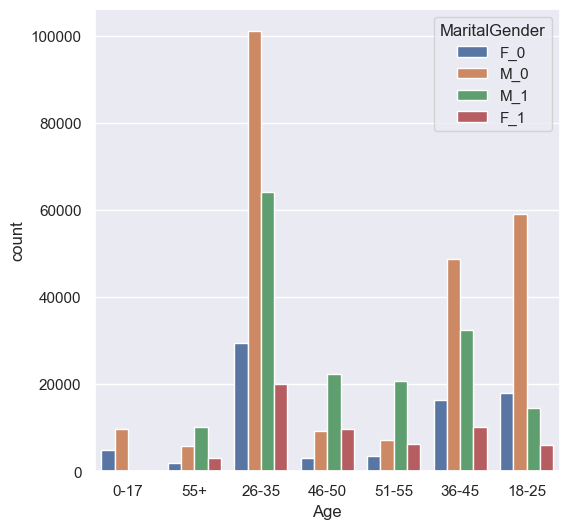

In [113]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

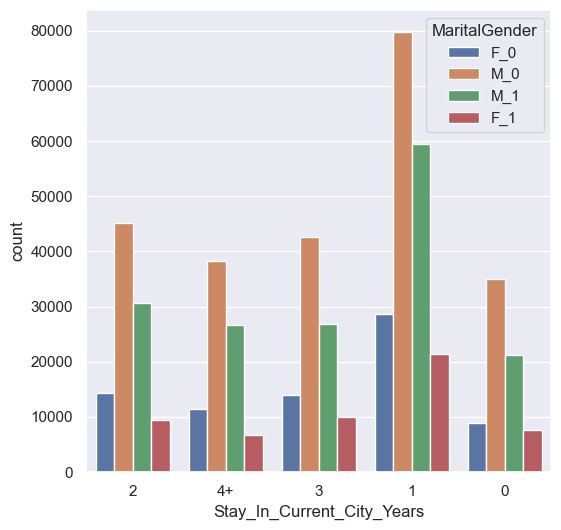

In [114]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

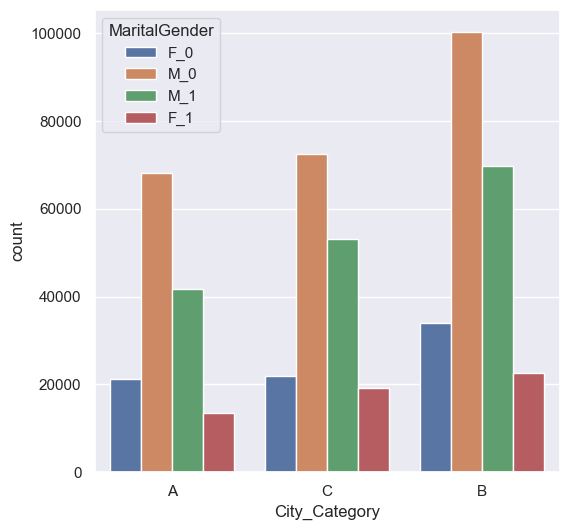

In [115]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])

# Overall Significance

A Black Friday sales project holds immense significance, serving as a pivotal moment for businesses to strategically boost revenue and engage customers. 

Beyond immediate financial gains, data analysis from this event provides crucial insights into consumer behavior, shaping future business decisions.

Black Friday's economic impact stimulates spending and reflects consumer confidence. As a cultural phenomenon, it has evolved with the rise of e-commerce and technology, influencing shopping traditions.

Successful projects not only enhance brand-consumer relationships but also contribute to broader economic vitality, showcasing the dynamic intersection of commerce, technology, and culture during this influential shopping event.





